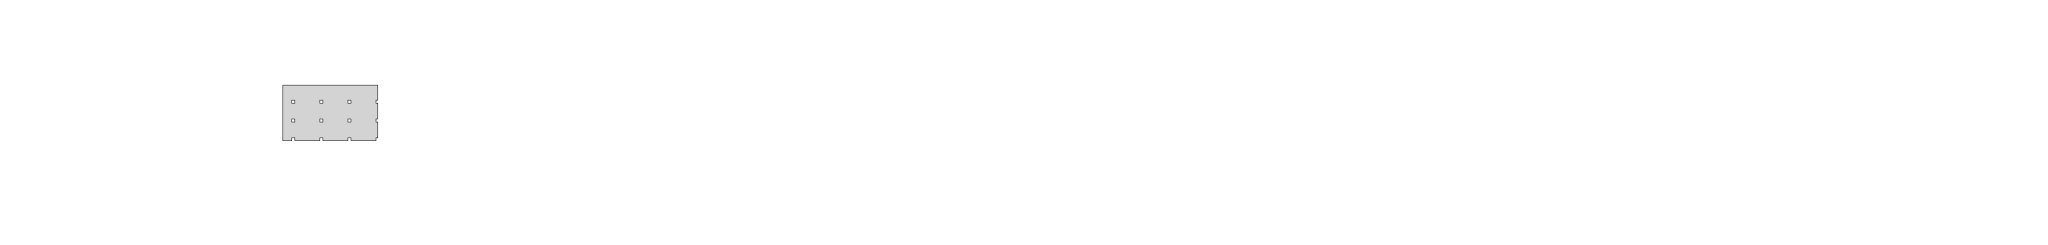

In [11]:
"""
Extinguisher.ipynb
TODO:
- [x] Get floor definition from Revit
- [x] Add Obstacles
- [ ] Add Doors (extinguisher to be closest to access points)
"""
__author__ = "Bob YX Lee"
import sys 
import os
import json
import drawsvg as dw
import random
from pprint import pprint
from copy import deepcopy

sys.path.append("./packages")

from geom.Line2D import Line2D

MM = 100

data = {}
# Get random data point
datafiles = os.listdir("./dataset")
data_path = os.path.join("./dataset", "test_api.json")#random.choice(datafiles))
data = {}
with open(data_path, "r") as f:
    data = json.loads(f.read())

d = dw.Drawing(4000, 480, origin = (-MM*4, -MM*2), id_prefix='pic')
dpath = dw.Path(stroke = 'black', fill = 'lightgray')
#print(data)
verts = data["room_dict"]["vertices"]
obs = data["room_dict"]["obstacles"]
for i, p in enumerate(verts):
    if i == 0: dpath.M(p[0]/MM, -p[1]/MM); continue
    dpath.L(p[0]/MM, -p[1]/MM);

for o in obs:
    for i, p in enumerate(o):
        if i == 0: dpath.M(p[0]/MM, -p[1]/MM); continue
        dpath.L(p[0]/MM, -p[1]/MM);
    
d.append(dpath)
d

[[28145.967741935478, 377.25806451606053], [28145.967741935478, -222.74193548394138], [27545.967741935474, -222.74193548394138], [27545.967741935474, 377.25806451606053], [28145.967741935478, 377.25806451606053]]


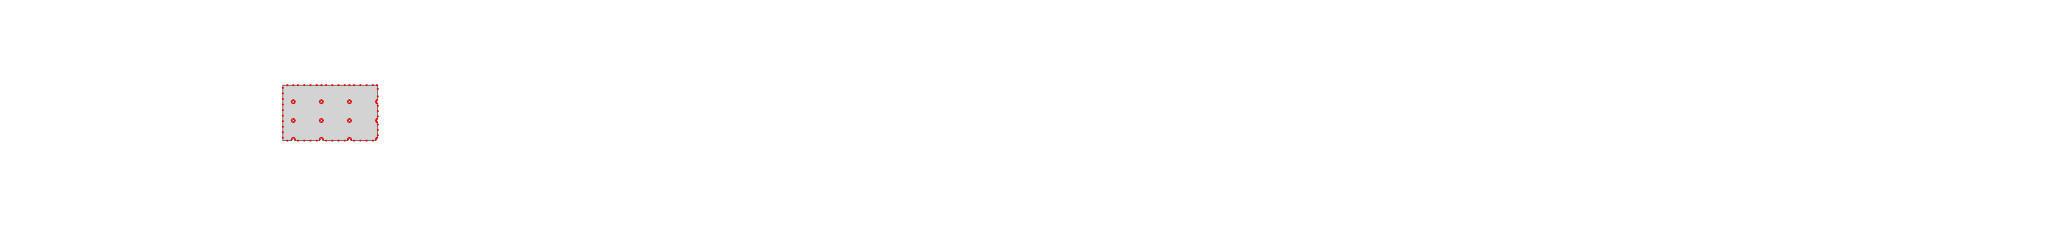

In [41]:
"""
Prepare candidate slots where extinguishers could be placed
"""
import numpy as np
from copy import deepcopy
from geom.Poly2D import getLines

def drawPt(d, pt, color = "red"):
    d.append(dw.Circle(pt[0]/MM, -pt[1]/MM, 2, fill=color))
    pass

def slotsFromLines(lines, div_len):
    ext_slots = []
    for l in lines:
        if l.length < div_len:
            ext_slots.append(l.mid)
            continue
        divs = l.divideByLength(div_len)
        ext_slots.extend([s.mid for s in divs])
    return ext_slots

# First get all the walls, including obstacle walls
boundary2d = deepcopy(verts)
print(obs[0])

#print(len(boundary2d))
# Get all the lines and split them into 1000m segs
blines = getLines(boundary2d)
olines = []
for o in obs:
    olines.extend(getLines(o))

ext_slots = []
div_len = 1000
#print(blines[0].length)
ext_slots.extend(slotsFromLines(blines, div_len))
ext_slots.extend(slotsFromLines(olines, div_len))

d2 = deepcopy(d)
for e in ext_slots: drawPt(d2, e)

d2


In [43]:
"""
Rule based solving algorithm
1. Pick a random ext slot to place on
2. Check whether coverage passes
3. If not pass, place at wall closest to the centroid of the diff
    3.1. Go to 2
4. If pass, check travel
5. If not pass, place extinguisher at most remote point

Rank by no. extinguishers, and return all options with the minimal no. extinguishers
"""
import random

cover_pass = False
exslt = deepcopy(ext_slots)

while cover_pass == False:
    pidx = random.randint(0, len(exslt) -1)
    cext = exslt.pop(pidx)
    print(cext)
    break


[24483.46774194  3317.25806452]
